#  Wireless Indoor Localization
-----

Comparison of different machine learning classification algorithms using de UCI dataset for Wireless Indoor Localization.

For each model different hyperparameters are applied using GridSearchCV, then best hyperparameters are selected to generate confusion matrix and compare accuracy between models.

### Source

https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization

Data Dictionary¶

Each attribute is wifi signal strength observed on smartphone.

                | Column  | Atrribute   | Definition     	        | Data Type    	| % Null Ratios |
                |---------|-------------|-----------------------------------------------|-------------- |
                | 1       | Wifi 1      | Signal strength of wifi 1  | Quantitative 	| 0             |
                | 2       | Wifi 2      | Signal strength of wifi 2  | Quantitative 	| 0             |
                | 3       | Wifi 3      | Signal strength of wifi 3  | Quantitative 	| 0             |
                | 4       | Wifi 4      | Signal strength of wifi 4  | Quantitative 	| 0             |
                | 5       | Wifi 5      | Signal strength of wifi 5  | Quantitative 	| 0             |
                | 6       | Wifi 6      | Signal strength of wifi 6  | Quantitative 	| 0             |
                | 7       | Wifi 7      | Signal strength of wifi 7  | Quantitative 	| 0             |
                | 8       | Room        | Rooms (1, 2, 3, 4) 	     | Quantitative     | 0             |
      

## 1. Import Libraries

In [2]:
#General
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#Deactivation of warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Function definitions

In [3]:
#Function to plot Hyperparameters heatmap and confusion matrix

def plotting(hmap,cm,best,grid_params,model):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    sns.set(rc={'figure.figsize':(4,4)})
    ax1 = sns.heatmap(hmap,annot=True,cmap='Blues',fmt='f',cbar=False)
    ax1.set_title('Best Hyperparameters: ' + str(best))
    hmap_keys = list(grid_params.keys())
    ax1.set_xlabel(hmap_keys[1])
    ax1.set_ylabel(hmap_keys[0])
    
    plt.subplot(122)
    sns.set(rc={'figure.figsize':(4,4)})
    ax2 = sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
    ax2.set_title('Confusion Matrix for ' + str(best))  
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.suptitle(model + ' Model',fontsize=16)

## 3. Data import and Descriptive Analysis

In [4]:
data = np.loadtxt('wifi_localization.txt',dtype=int)

In [5]:
col = ['wifi1','wifi2','wifi3','wifi4','wifi5','wifi6','wifi7','room']
df = pd.DataFrame(data,columns=col)
df

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [6]:
df.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [7]:
df.tail()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


In [9]:
df.groupby('room').count()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7
room,,,,,,,
1,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500
4,500,500,500,500,500,500,500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wifi1   2000 non-null   int32
 1   wifi2   2000 non-null   int32
 2   wifi3   2000 non-null   int32
 3   wifi4   2000 non-null   int32
 4   wifi5   2000 non-null   int32
 5   wifi6   2000 non-null   int32
 6   wifi7   2000 non-null   int32
 7   room    2000 non-null   int32
dtypes: int32(8)
memory usage: 62.6 KB


In [11]:
df.describe()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [9]:
#Separation in train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('room',axis=1),
                                                    df['room'], 
                                                    test_size = 0.3, random_state = 0)
#Normalization of the Dataset
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

In [12]:
X_test.shape

(600, 7)

In [13]:
X_train.shape

(1400, 7)

#  Data visulization

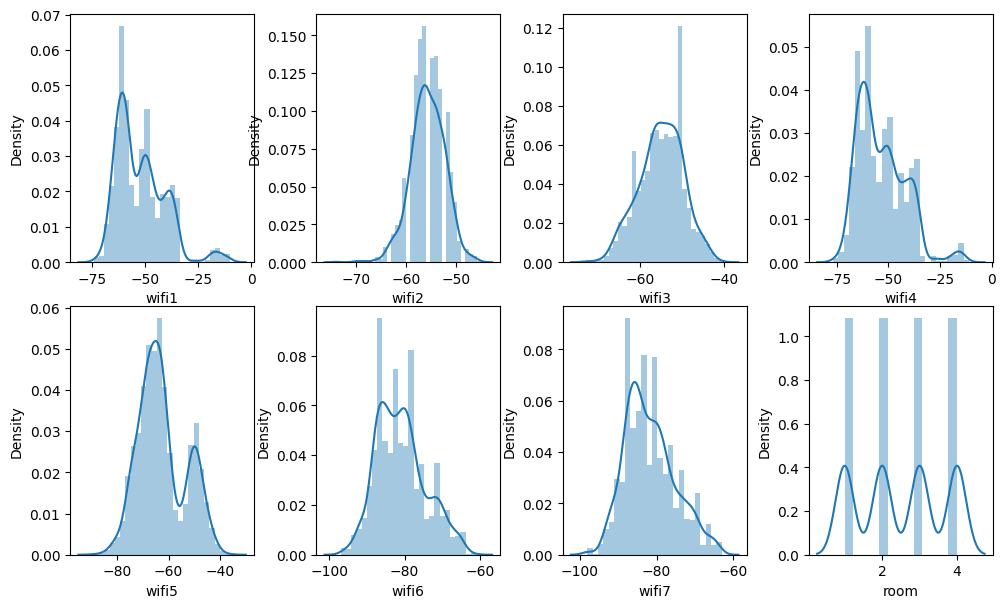

In [12]:
fig, ax = plt.subplots(2,4, figsize=(10,6));
fig.tight_layout() 

sns.distplot(df['wifi1'], ax=ax[0, 0]);
sns.distplot(df['wifi2'], ax=ax[0, 1]);
sns.distplot(df['wifi3'], ax=ax[0, 2]);
sns.distplot(df['wifi4'], ax=ax[0, 3]);
sns.distplot(df['wifi5'], ax=ax[1, 0]);
sns.distplot(df['wifi6'], ax=ax[1, 1]);
sns.distplot(df['wifi7'], ax=ax[1, 2]);
sns.distplot(df['room'], ax=ax[1, 3]);
fig.show();

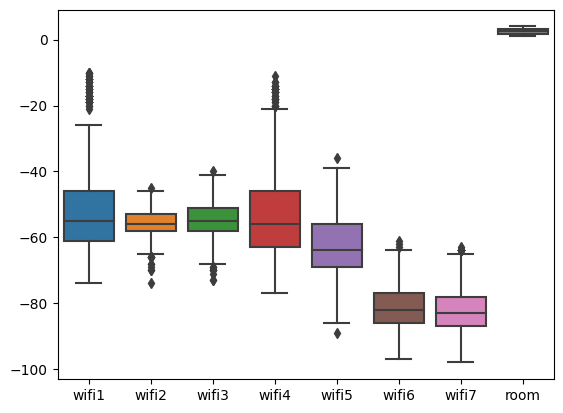

In [13]:
sns.boxplot(data=df);

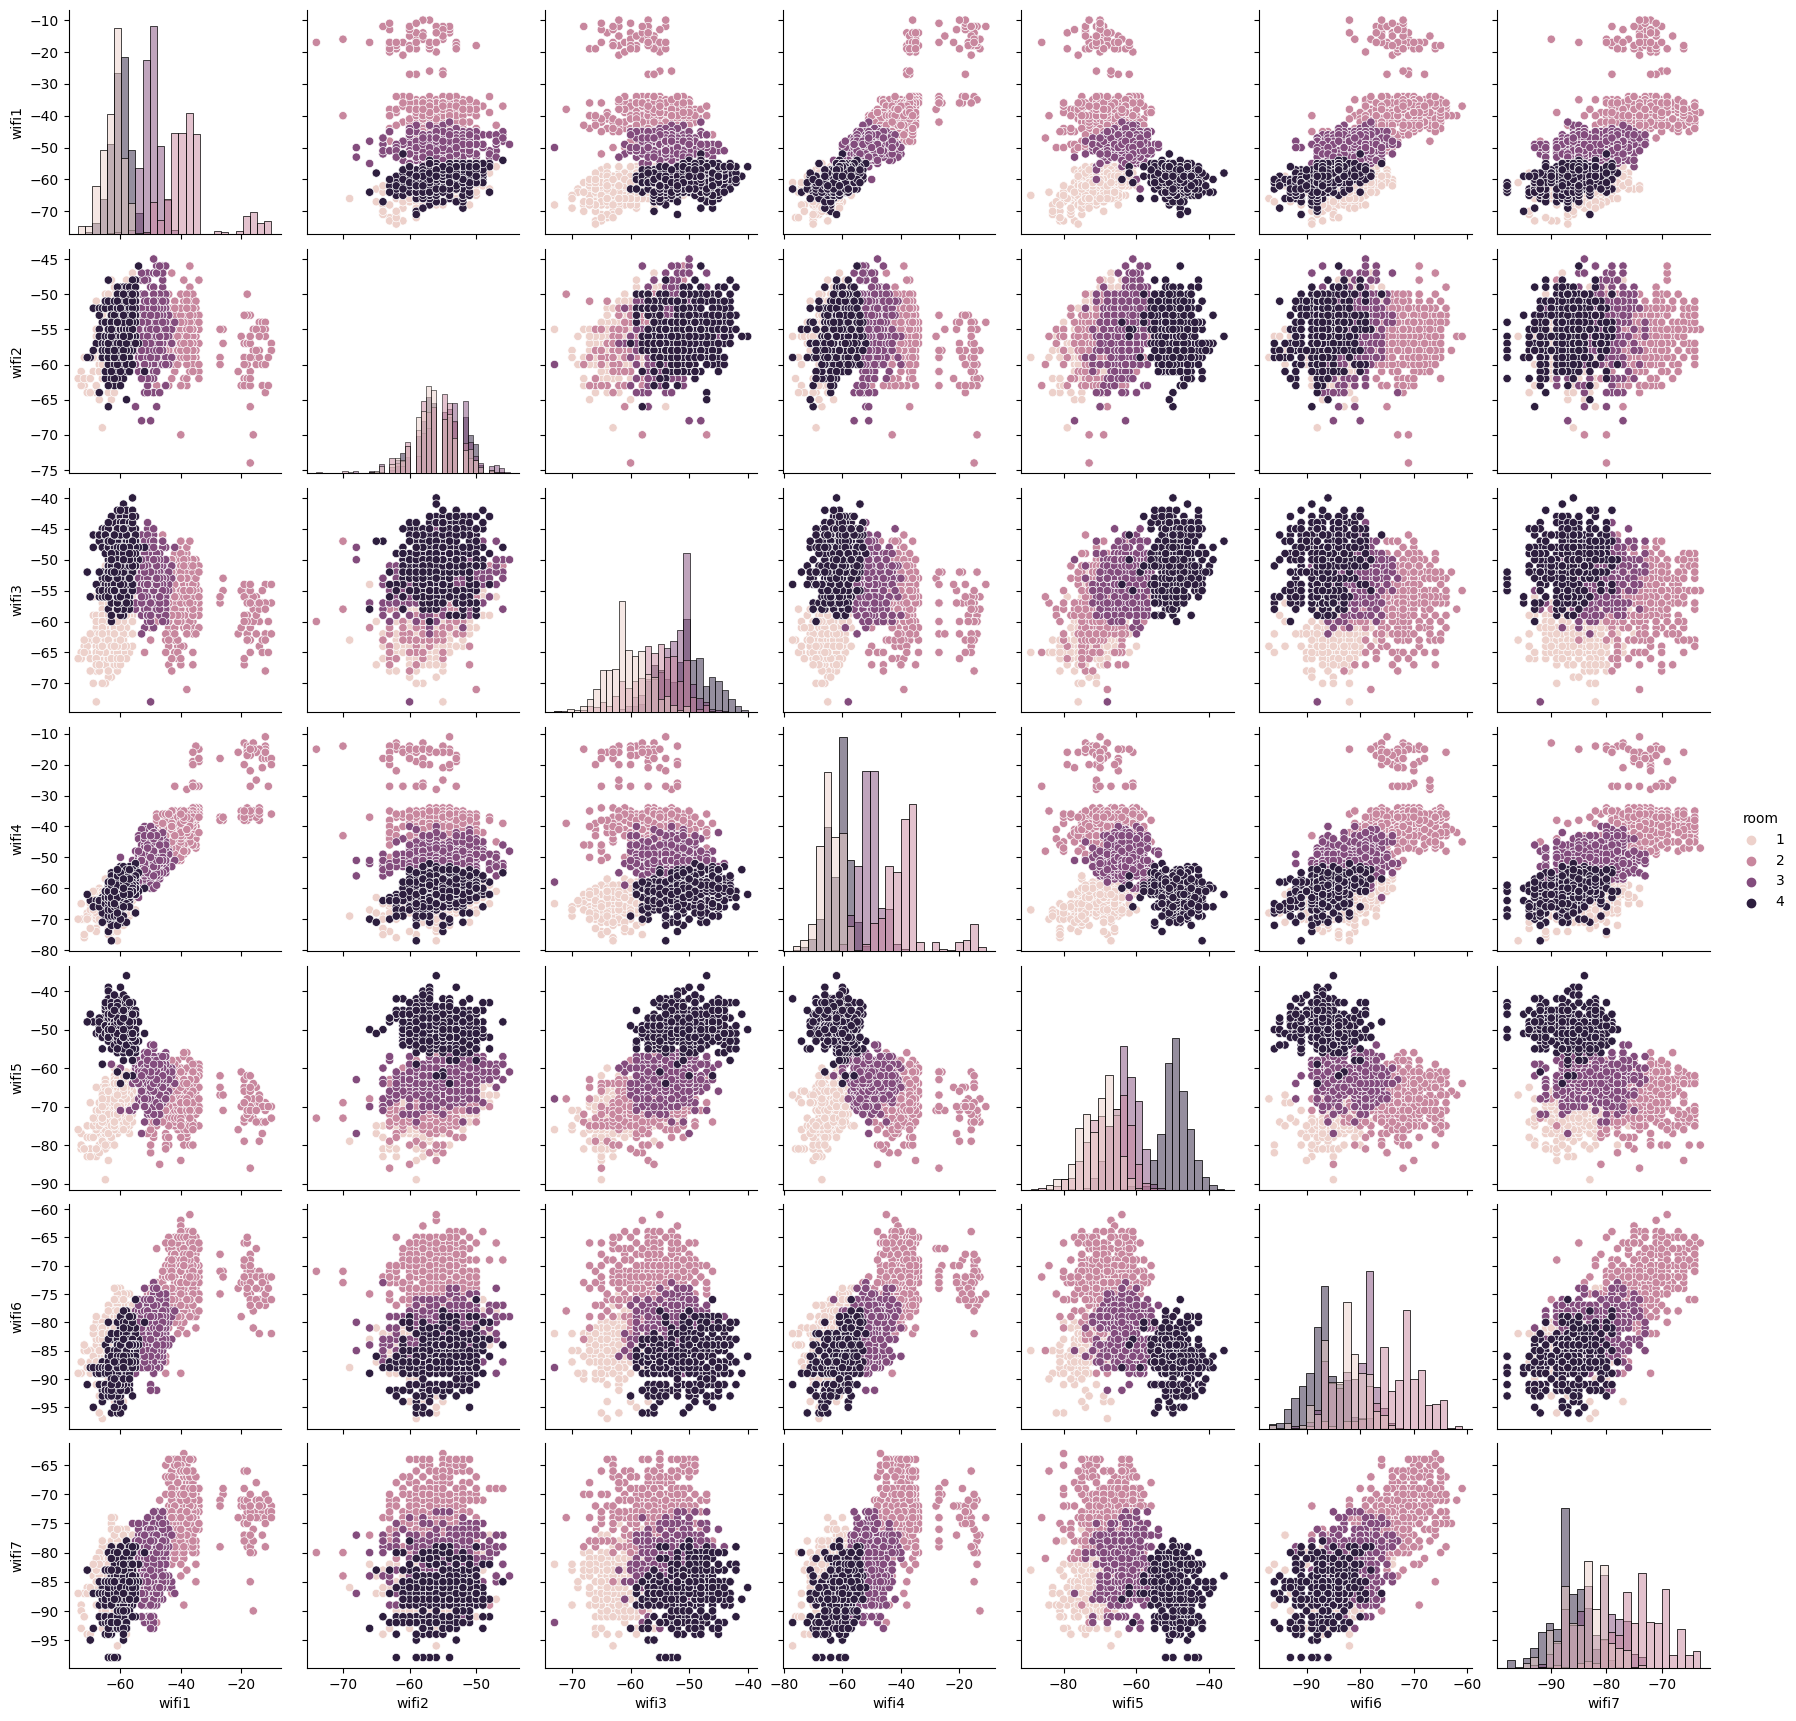

In [14]:
sns.pairplot(data=df, hue='room', diag_kind='hist');

In [18]:
#Definition of k from values between 1 and 10
k = list(range(1,11))

#Dictionary of arguments to pass to GridSearchDV
grid_params = {'n_neighbors':k,'weights':['uniform','distance']}

#Model generation
gs = GridSearchCV(KNeighborsClassifier(),grid_params,cv=4)
gs_results = gs.fit(X_train,y_train)
#We obtain the mean of the iterations
a = gs_results.cv_results_['mean_test_score']

In [19]:
#Best parameters obtained with the GridSearchCV
gs_results.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [20]:
#KNN model with best parameters
knn = KNeighborsClassifier(n_neighbors = gs_results.best_params_['n_neighbors'], 
                           weights = gs_results.best_params_['weights'])
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

## 4. Model Generation

## 4.1. *k* nearest neighbours

In [21]:
#Prediction
y_pred = knn.predict(X_test)

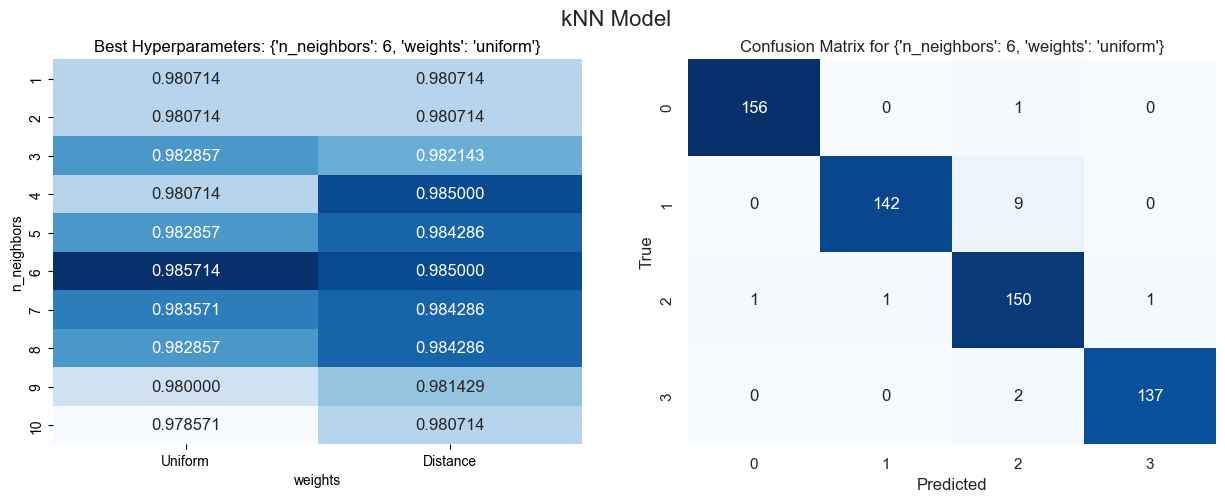

In [23]:
#Dataframe to create heatmap
b=a.reshape(10,2)
heatmap_df = pd.DataFrame(data=b,index=k,columns=['Uniform','Distance'])

#Accuracy & confusion matrix
accuracies = {'kNN':knn.score(X_train,y_train)}
c_matrix = confusion_matrix(y_test, y_pred)

#Plot
plotting(heatmap_df,c_matrix,gs_results.best_params_,grid_params,'kNN')

## 4.2. Support Vector Machines

In [27]:
#Definition of values for C & gamma
c = [0.01, 0.1, 1, 10, 50, 100, 200]
gamma = [0.001, 0.01, 0.1, 1, 10]

#Dictionary of arguments to pass to GridSearchDV
grid_params_svc = {'C':c,'gamma':gamma}

#Model generation
gs_svc = GridSearchCV(SVC(),grid_params_svc,cv=4)
gs_results_svc = gs_svc.fit(X_train,y_train)

#We obtain the mean of the iterations
a = gs_results_svc.cv_results_['mean_test_score']

In [28]:
#Best parameters obtained with the GridSearchCV
gs_results_svc.best_params_

{'C': 10, 'gamma': 0.1}

In [29]:
# SVM model with best hyperparameters
svc = SVC(C = gs_results_svc.best_params_['C'], gamma = gs_results_svc.best_params_['gamma'], probability=True)  
svc.fit(X_train,y_train)

SVC(C=10, gamma=0.1, probability=True)

In [30]:
#Prediction
y_pred_svc = svc.predict(X_test)

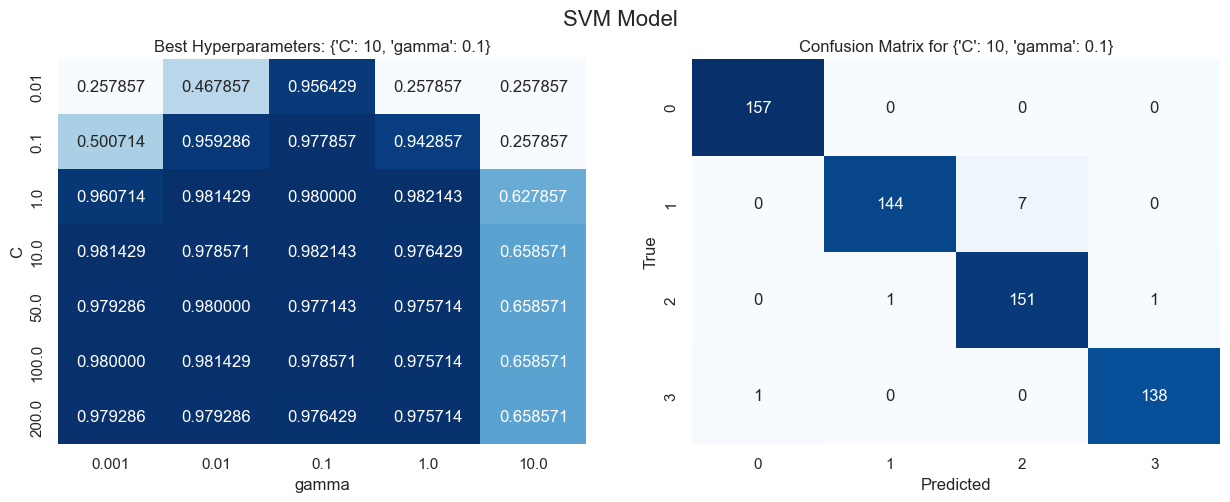

In [31]:
#Dataframe to create heatmap
b=a.reshape(7,5)
heatmap_df_svc = pd.DataFrame(data=b,index=c,columns=gamma)

#Accuracy & confusion matrix
accuracies.update({'SVM':svc.score(X_train,y_train)})
c_matrix_svc = confusion_matrix(y_test, y_pred_svc)

#Plot
plotting(heatmap_df_svc,c_matrix_svc,gs_results_svc.best_params_,grid_params_svc,'SVM')

## 4.3.  Decision Trees

In [32]:
#Definition of values for depth & samples
depth = list(range(3,10))
samples = [2, 10, 20, 50, 100]

#Dictionary of arguments to pass to GridSearchDV
grid_params_dt = {'max_depth':depth,'min_samples_split':samples,'random_state':[0]}

#Model generation
gs_dt = GridSearchCV(DecisionTreeClassifier(),grid_params_dt,cv=4)
gs_results_dt = gs_dt.fit(X_train,y_train)

#We obtain the mean of the iterations
a = gs_results_dt.cv_results_['mean_test_score']

In [33]:
#Best parameters obtained with the GridSearchCV
gs_results_dt.best_params_

{'max_depth': 4, 'min_samples_split': 2, 'random_state': 0}

In [34]:
# DT model with best hyperparameters
dt = DecisionTreeClassifier(max_depth = gs_results_dt.best_params_['max_depth'], 
                            min_samples_split = gs_results_dt.best_params_['min_samples_split'])
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [35]:
#Prediction
y_pred_dt = dt.predict(X_test)

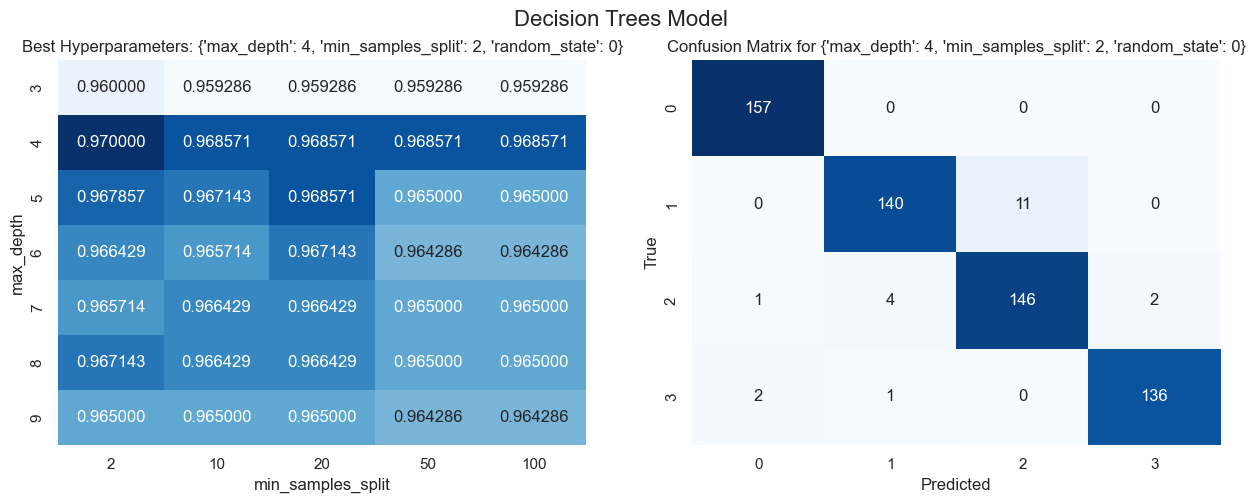

In [36]:
#Dataframe to create heatmap
b=a.reshape(7,5)
heatmap_df_dt = pd.DataFrame(data=b,index=depth,columns=samples)

#Accuracy & confusion matrix
accuracies.update({'DecisionTree':dt.score(X_train,y_train)})
c_matrix_dt = confusion_matrix(y_test, y_pred_dt)

#Plot
plotting(heatmap_df_dt,c_matrix_dt,gs_results_dt.best_params_,grid_params_dt,'Decision Trees')


In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train.ravel())
print("accuracy: ", dt.score(X_test, y_test))

accuracy:  0.96


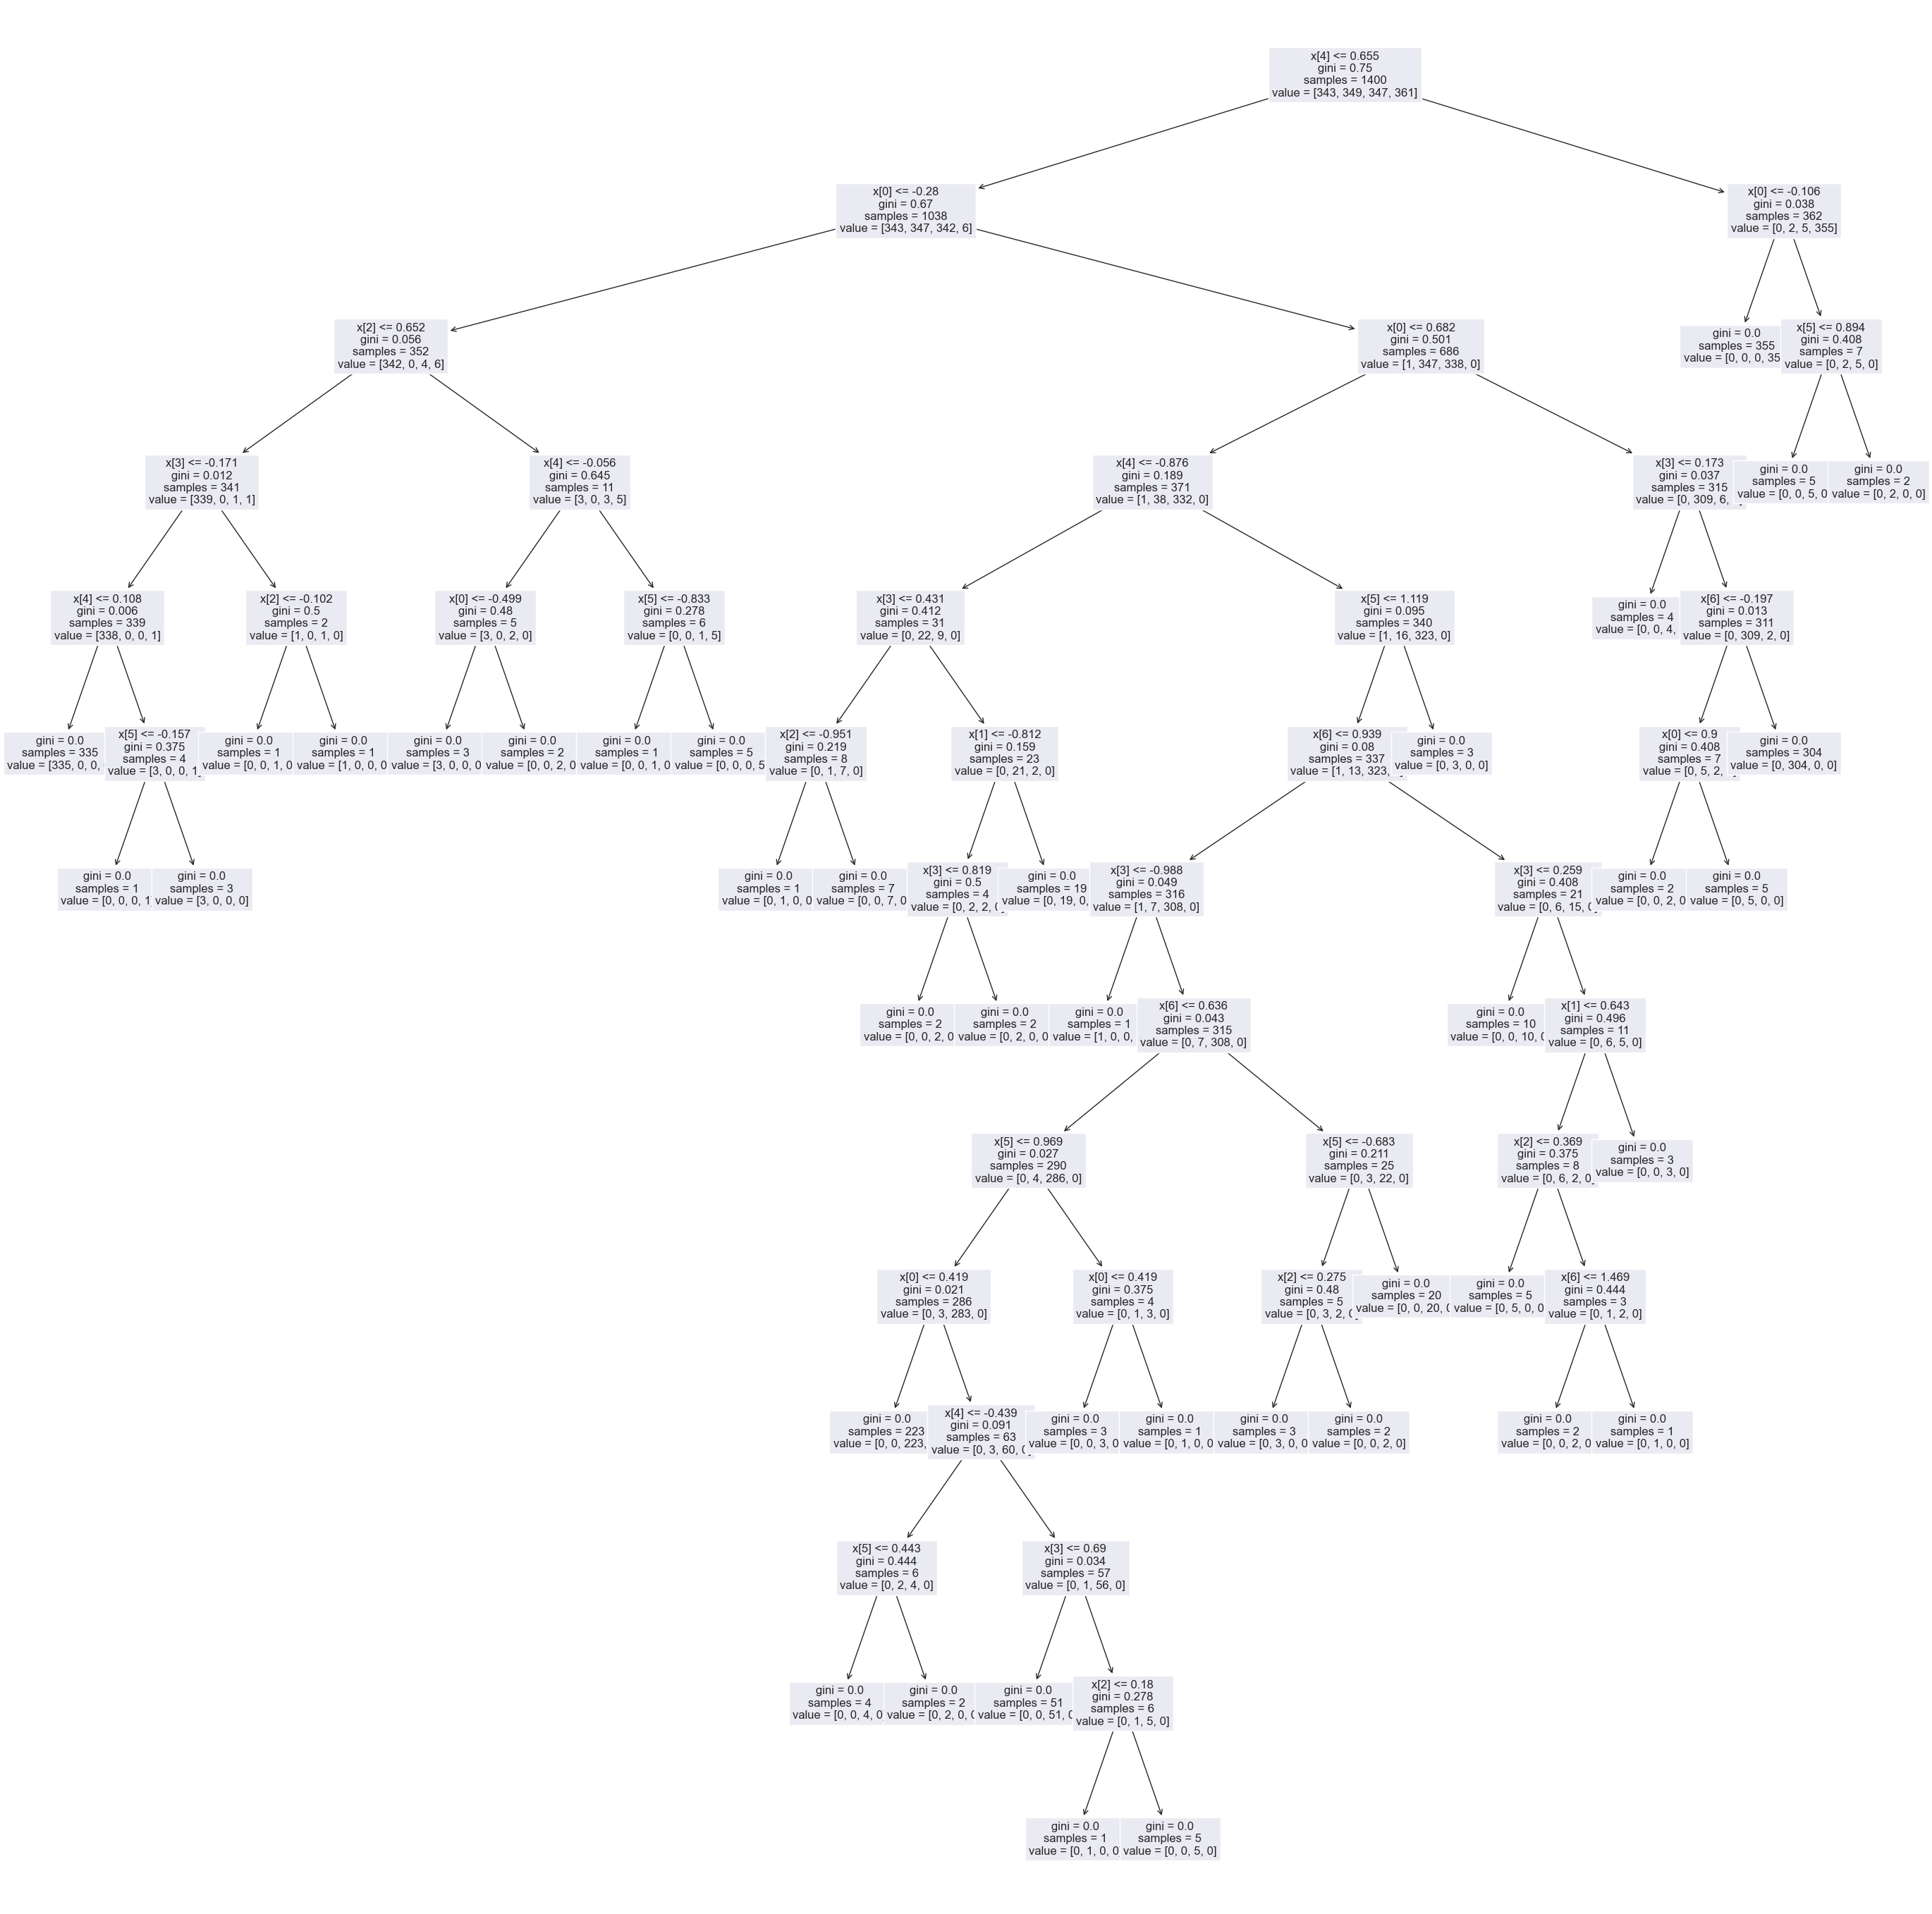

In [60]:
plt.figure(figsize=(35,35))
temp = tree.plot_tree(dt, fontsize=12)

## 4.4. Random Forest

In [38]:
#Definition of different values for max_depth and estimators
max_depth = list(range(7,14))
n = [10, 50, 100, 200]

#Dictionary of arguments to pass to GridSearchDV
grid_params_rf = {'max_depth':max_depth,'n_estimators':n,'random_state':[0]}

#Model generation
gs_rf = GridSearchCV(RandomForestClassifier(),grid_params_rf,cv=4)
gs_results_rf = gs_rf.fit(X_train,y_train)

#We obtain the mean of the iterations
a = gs_results_rf.cv_results_['mean_test_score']

In [39]:
#Best parameters obtained with the GridSearchCV
gs_results_rf.best_params_

{'max_depth': 12, 'n_estimators': 200, 'random_state': 0}

In [40]:
# Random Forest model with best hyperparameters
rf = RandomForestClassifier(n_estimators = gs_results_rf.best_params_['n_estimators'],
                            max_depth = gs_results_rf.best_params_['max_depth'],
                            random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=0)

In [41]:
#Prediction
y_pred_rf = rf.predict(X_test)

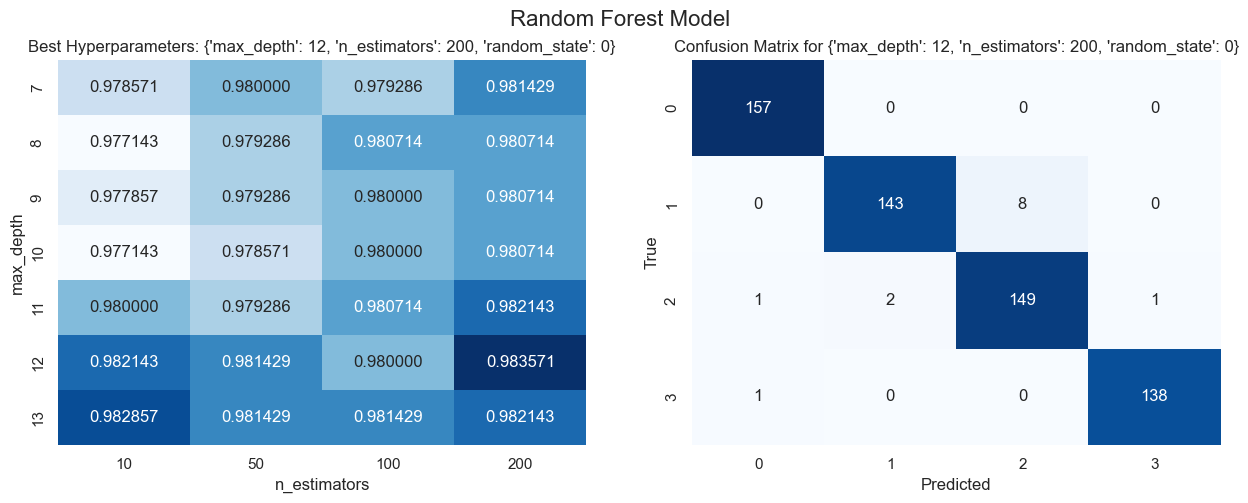

In [42]:
#Dataframe to create heatmap
b=a.reshape(7,4)
heatmap_df_rf = pd.DataFrame(data=b,index=max_depth,columns=n)

#Accuracy & confusion matrix
accuracies.update({'RandomForest':rf.score(X_train,y_train)})
c_matrix_rf = confusion_matrix(y_test, y_pred_rf)

#Plot
plotting(heatmap_df_rf,c_matrix_rf,gs_results_rf.best_params_,grid_params_rf,'Random Forest')

## 4.5. Gradient Boosting

In [43]:
#Definition of different values for learning rate and estimators
learning = [0.01, 0.1, 1, 2]
n = [10, 50, 100, 200]

#Dictionary of arguments to pass to GridSearchDV
grid_params_gb = {'learning_rate':learning,'n_estimators':n,'random_state':[0]}

#Model generation
gs_gb = GridSearchCV(GradientBoostingClassifier(),grid_params_gb,cv=4)
gs_results_gb = gs_gb.fit(X_train,y_train)

#We obtain the mean of the iterations
a = gs_results_gb.cv_results_['mean_test_score']

In [44]:
#Best parameters obtained with the GridSearchCV
gs_results_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [45]:
# Gradient Boosting model with best hyperparameters
gb = GradientBoostingClassifier(n_estimators=gs_results_gb.best_params_['n_estimators'],
                                learning_rate = gs_results_gb.best_params_['learning_rate'],
                                random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [46]:
#Prediction
y_pred_gb = gb.predict(X_test)

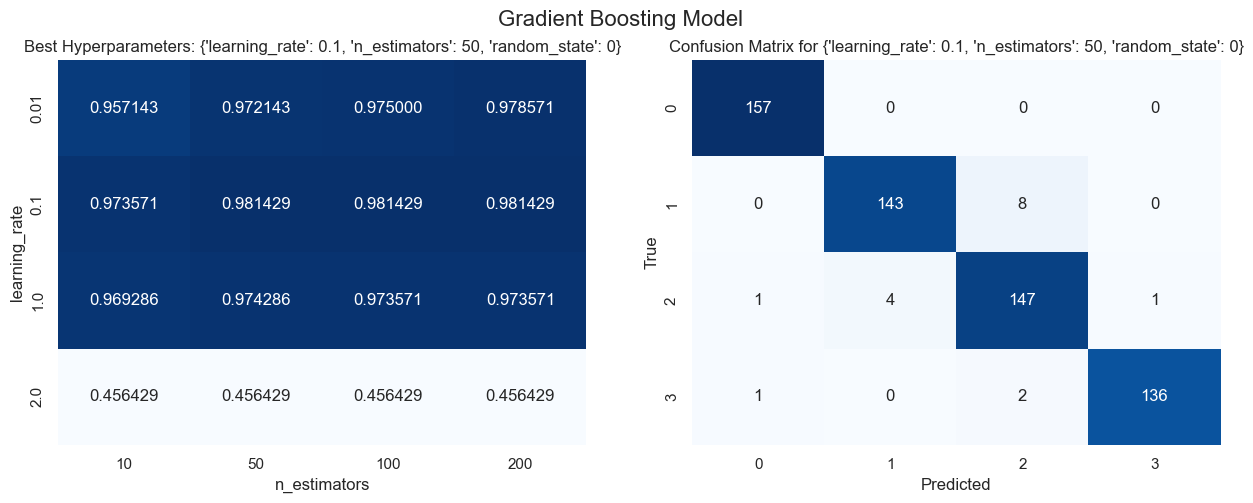

In [47]:
#Dataframe to create heatmap
b=a.reshape(4,4)
heatmap_df_gb = pd.DataFrame(data=b,index=learning,columns=n)

#Accuracy & confusion matrix
accuracies.update({'GradientBoosting':gb.score(X_train,y_train)})
c_matrix_gb = confusion_matrix(y_test, y_pred_gb)

#Plot
plotting(heatmap_df_gb,c_matrix_gb,gs_results_gb.best_params_,grid_params_gb,'Gradient Boosting')

## 4.6 Logistic Regression

In [70]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)
train_set_att = train_set.drop(['room'], axis=1)
train_set_t = train_set['room']
test_set_att = test_set.drop(['room'], axis=1)
test_set_t = test_set['room']

lr = LogisticRegression()
lr.fit(train_set_att, train_set_t)
print("accuracy : ", lr.score(test_set_att, test_set_t))

accuracy :  0.975


# 5. Models Accuracy Comparison

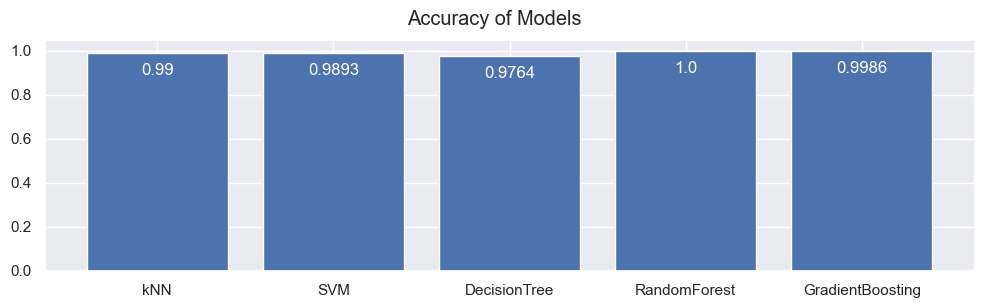

In [77]:
models = list(accuracies.keys())
values = list(accuracies.values())
valuesRounded =  [round(x,4) for x in values] 

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.bar(models, valuesRounded)

fig.suptitle('Accuracy of Models')

for p in ax.patches:
    b = str(p.get_height())
    ax.annotate(b,xy=(p.get_x()+(p.get_width()/2),p.get_height()-0.10),ha='center',color="white")